In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
books = pd.read_csv("books.csv")
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

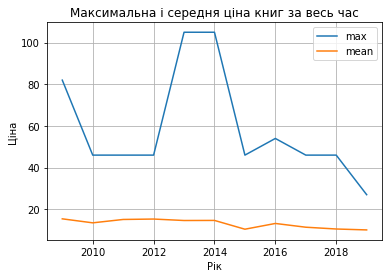

In [10]:
book_years = books[["year", "price"]].groupby('year').agg(["max", "mean"])
plt.xlabel("Рік")
plt.ylabel("Ціна")
plt.grid()
plt.title("Максимальна і середня ціна книг за весь час")
plt.plot(book_years, label=["max", "mean"])
plt.legend()
plt.show()

[Text(0.5, 1.0, 'Рейтинг книг по жанрах')]

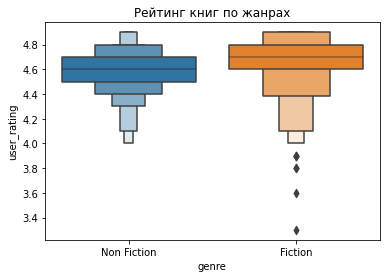

In [15]:
sns.boxenplot(x='genre', y='user_rating', data=books).set(title="Рейтинг книг по жанрах")

[Text(0.5, 1.0, 'Графік кореляції між середнім рейтингом автора та кількістю написаних ним книг')]

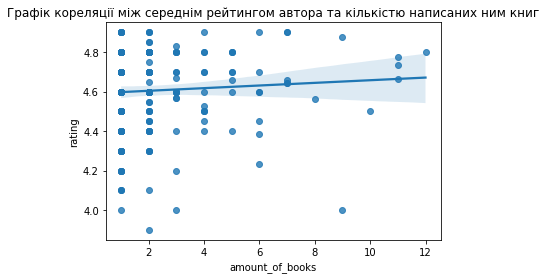

In [25]:
book_authors = books[["author"]].groupby("author").agg({'author':'count'}).rename(columns = {'author':  "amount_of_books"})
rating_authors = books.groupby("author").agg({"user_rating": "mean"}).rename(columns = {'user_rating':  "rating"})
authors = pd.concat([book_authors, rating_authors], axis=1)
sns.regplot(x="amount_of_books", y="rating", data=authors).set(title="Графік кореляції між середнім рейтингом автора та кількістю написаних ним книг")